In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    def __init__(self, in_features = 4, h1 =8, h2 =9, out_features = 3): # how many layers? Input layer(4 features) >> h1 >> h2 >> output(3 classes)
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2, out_features)
        pass

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x =  self.out(x)
        return x

In [5]:
torch.manual_seed(32) 
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('C:/Users/thomtt10/Documents/PRACTICE_CODE/Pytorch_Udemy/Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [19]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.001)


In [15]:
model.parameters()

<generator object Module.parameters at 0x0000015A26ADD228>

In [20]:
#an epoch, 1 run through all the training data
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.15071154
epoch: 11  loss: 1.11645937
epoch: 21  loss: 1.08527517
epoch: 31  loss: 1.06085408
epoch: 41  loss: 1.03624964
epoch: 51  loss: 1.01067436
epoch: 61  loss: 0.98596859
epoch: 71  loss: 0.96150762
epoch: 81  loss: 0.93921715
epoch: 91  loss: 0.91684467


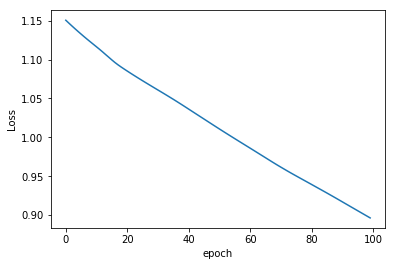

In [21]:
#plot the loss function 
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [22]:
#  TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.90905339


In [23]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-0.3328,  0.3518,  0.1768])     1
 2. tensor([-0.4136,  0.3950,  0.2280])     1
 3. tensor([ 0.1780, -0.0869, -0.1472])     0
 4. tensor([-0.4812,  0.4208,  0.2509])     1
 5. tensor([-0.5368,  0.4495,  0.2771])     2
 6. tensor([-0.6369,  0.4584,  0.3058])     2
 7. tensor([ 0.1812, -0.0807, -0.1407])     0
 8. tensor([ 0.1932, -0.1188, -0.1621])     0
 9. tensor([-0.5320,  0.4421,  0.2766])     2
10. tensor([-0.6526,  0.4760,  0.3230])     2
11. tensor([-0.6582,  0.4792,  0.3259])     2
12. tensor([ 0.1889, -0.1021, -0.1629])     0
13. tensor([-0.5746,  0.4364,  0.2810])     2
14. tensor([-0.4199,  0.4000,  0.2254])     1
15. tensor([-0.6277,  0.4570,  0.3042])     2
16. tensor([-0.4004,  0.3903,  0.2181])     1
17. tensor([-0.4656,  0.4007,  0.2332])     2
18. tensor([ 0.1950, -0.1142, -0.1572])     0
19. tensor([-0.3980,  0.3872,  0.2186])     1
20. tensor([-0.6186,  0.4942,  0.3328])     2
21. tensor([ 0.1664, -0.0824, -0.1407])     0
22. tensor([ 0.1754, -0.1048, -0.1

In [ ]:
#Save the trained model to a file 

## Save the trained model to a file
Right now <strong><tt>model</tt></strong> has been trained and validated, and seems to correctly classify an iris 97% of the time. Let's save this to disk.<br>
The tools we'll use are <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><strong><tt>torch.save()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.load'><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class. The syntax follows:<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
<strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, you must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

For more information visit https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [27]:
# Save the model 
torch.save(model.state_dict(), 'C:/Users/thomtt10/Documents/PRACTICE_CODE/Pytorch_Udemy/ANN/IrisDatasetModel.pt')

In [28]:
# Load a new model 
new_model = Model()
new_model.load_state_dict(torch.load('C:/Users/thomtt10/Documents/PRACTICE_CODE/Pytorch_Udemy/ANN/IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [29]:
## Apply the model to classify new, unseen data
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

Let's plot this new iris in yellow to see where it falls in relation to the others:

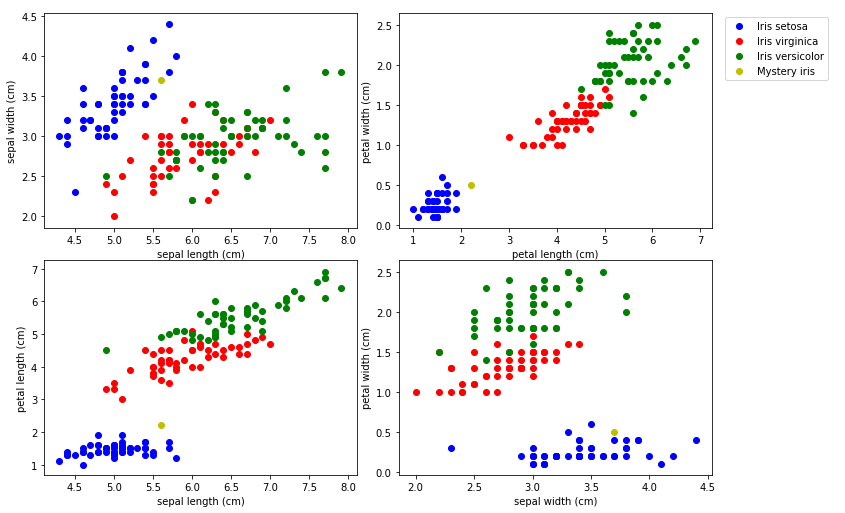

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [31]:
# Run it through the model:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 0.0987, -0.0305, -0.0890])

Iris setosa
